In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr

os.chdir("../")
from epitools import get_data

In [29]:
output = []

for item in [
    ("Argentina", [2023], "first_round", "district"),
    ("Belgium", [2019], "general", "nuts_2"),
    ("Brazil", [2022], "first_round", "region_id"),
    ("Canada", [2021], "federal", "state"),
    ("Chile", [2021], "first_round", "region_id"),
    ("France", [2022], "first_round", "nuts_2"),
    ("Germany", [2021], "general", "nuts_2"),
    ("Italy", [2022], "first_round", "nuts_2"),
    ("Mexico", [2018], "first_round", "state_id"),
    ("New Zealand", [2023], "general", "region"),
    ("Peru", [2021], "first_round", "region"),
    ("Spain", [2019], "general", "nuts_2"),
    ("United States", [2020], "first_round", "state"),
]:
    country, years, election_round, aggregation = item
    print(country)
    for year in years:
        test = get_data(
            aggregation=aggregation,
            country=country,
            election=election_round,
            year=year 
        )
        if country == "United States":
            test = test[test["state"].isin(["DISTRICT OF COLUMBIA", "HAWAII", "PUERTO RICO"])]
        test["country"] = country

        for col in ["ec", "ep"]:
            test[f"{col}_n"] = (test[col] - test[col].mean()) / test[col].std()

        output.append(test)

data = pd.concat(output, ignore_index=True)
data["sum"] = data["ec_n"] + data["ep_n"]
data.head()

Argentina
Belgium
Brazil
Canada
Chile
France
Germany
Italy
Mexico
New Zealand
Peru
Spain
United States


,district,ec,ep,year,country,ec_n,ep_n,nuts_2,region_id,state,state_id,region,sum
0,Buenos Aires,0.730183,0.155283,2023,Argentina,-0.911687,-0.464135,NaN,NaN,NaN,NaN,NaN,-1.375822
1,Catamarca,0.804770,0.184151,2023,Argentina,0.134265,0.589287,NaN,NaN,NaN,NaN,NaN,0.723552
2,Chaco,0.748376,0.185732,2023,Argentina,-0.656560,0.646973,NaN,NaN,NaN,NaN,NaN,-0.009587
3,Chubut,0.856544,0.136638,2023,Argentina,0.860306,-1.144492,NaN,NaN,NaN,NaN,NaN,-0.284186
4,Ciudad Autónoma de Buenos Aires,0.784845,0.201391,2023,Argentina,-0.145146,1.218403,NaN,NaN,NaN,NaN,NaN,1.073257


In [3]:
data.corr().round(3)

C:\Users\cnava\AppData\Local\Temp\ipykernel_34536\1452808869.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().round(3)


,ec,ep,year,ec_n,ep_n,is_cl
ec,1.000,-0.686,0.090,0.652,-0.211,0.196
ep,-0.686,1.000,0.116,-0.272,0.523,-0.191
year,0.090,0.116,1.000,-0.000,-0.000,-0.005
ec_n,0.652,-0.272,-0.000,1.000,-0.253,-0.000
ep_n,-0.211,0.523,-0.000,-0.253,1.000,0.000
is_cl,0.196,-0.191,-0.005,-0.000,0.000,1.000


In [30]:
data.sort_values("sum")

,district,ec,ep,year,country,ec_n,ep_n,nuts_2,region_id,state,state_id,region,sum
114,NaN,0.493291,0.090424,2022,France,-2.542004,-1.967188,FRY1,NaN,NaN,NaN,NaN,-4.509192
115,NaN,0.480270,0.107932,2022,France,-2.674629,-1.603521,FRY2,NaN,NaN,NaN,NaN,-4.278150
116,NaN,0.527365,0.086422,2022,France,-2.194966,-2.050313,FRY3,NaN,NaN,NaN,NaN,-4.245279
194,NaN,0.230957,0.115001,2018,Mexico,-2.414025,-1.666556,NaN,NaN,NaN,27,NaN,-4.080581
196,NaN,0.316481,0.099360,2018,Mexico,-1.768097,-1.933801,NaN,NaN,NaN,29,NaN,-3.701898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,NaN,0.708268,0.288737,2021,Germany,-0.771968,2.956839,DE94,NaN,NaN,NaN,NaN,2.184871
205,NaN,0.657274,0.298831,2018,Mexico,0.805775,1.474221,NaN,NaN,NaN,8,NaN,2.279996
62,NaN,0.600669,0.383218,2022,Brazil,-0.875601,3.295865,NaN,ZZ,NaN,NaN,NaN,2.420264
185,NaN,0.694432,0.301463,2018,Mexico,1.086415,1.519200,NaN,NaN,NaN,19,NaN,2.605615


In [ ]:
data[""]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-0.2531242611596467 2.1583063981985044e-05


Text(0.975, 0.925, '$P$ < 0.001')

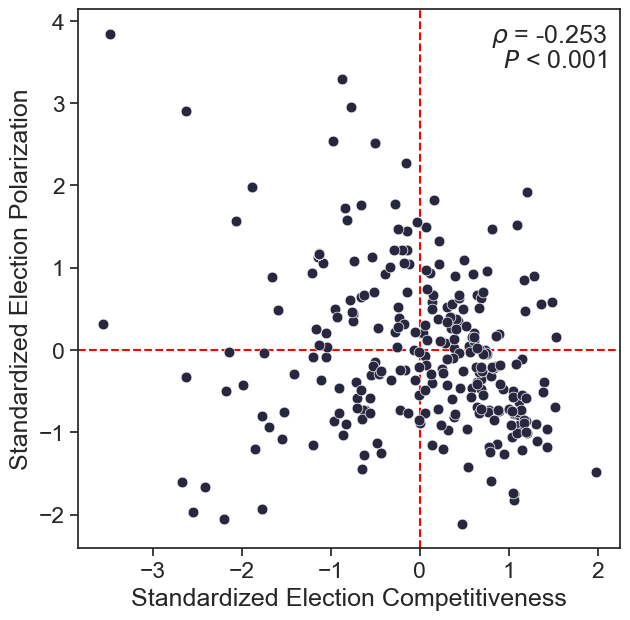

In [28]:
sns.set_theme(font_scale=1.5, style="ticks")

fig, ax = plt.subplots(figsize=(7, 7))

ax.axvline(x=0, color="red", ls="--")
ax.axhline(y=0, color="red", ls="--")

sns.scatterplot(x="ec_n", y="ep_n", color="#272740", s=60, linewidth=0.5, zorder=99, data=data)

ax.set_xlabel("Standardized Election Competitiveness")
ax.set_ylabel("Standardized Election Polarization")
leg = ax.legend()
leg.remove()

value, pvalue = pearsonr(data["ec_n"], data["ep_n"])
print(value, pvalue)

ax.text(0.975, 0.975, f"$ρ$ = {value.round(3)}", va="top", ha="right", transform=ax.transAxes)
ax.text(0.975, 0.925, "$P$ < 0.001" if pvalue < 0.001 else f"P={pvalue.round(3)}", va="top", ha="right", transform=ax.transAxes)
